In [1]:
import pandas as pd
import numpy as np

In [2]:
article = pd.read_csv('/Users/viswanathravindran/AVDatahack/NewsArticle/article.csv')
user = pd.read_csv('/Users/viswanathravindran/AVDatahack/NewsArticle/user.csv')
train = pd.read_csv('/Users/viswanathravindran/AVDatahack/NewsArticle/train.csv')
test = pd.read_csv('/Users/viswanathravindran/AVDatahack/NewsArticle/test.csv')

In [3]:
test.head()

,User_ID,Article_ID,ID
0,20080822161,1219173561,20080822161_1219173561
1,20080839116,1219217951,20080839116_1219217951
2,20080831336,1219224091,20080831336_1219224091
3,20080820936,1219186943,20080820936_1219186943
4,20080823287,1219165896,20080823287_1219165896


In [4]:
article.head()

,Article_ID,VintageMonths,NumberOfArticlesBySameAuthor,NumberOfArticlesinSameCategory
0,1219098423,10.0,3,503
1,1219098424,9.0,3,503
2,1219098425,10.0,46,503
3,1219098426,9.0,46,503
4,1219098427,9.0,38,503


In [5]:
print 'Shape of the dataset is :', article.shape
print 'No.of Null in VintageMonths:-', sum(pd.isnull(article['VintageMonths']))
print 'No.of Null in NumberOfArticlesBySameAuthor:-', sum(pd.isnull(article['NumberOfArticlesBySameAuthor']))
print 'No.of Null in NumberOfArticlesinSameCategory:-', sum(pd.isnull(article['NumberOfArticlesinSameCategory']))

Shape of the dataset is : (261758, 4)
No.of Null in VintageMonths:- 4659
No.of Null in NumberOfArticlesBySameAuthor:- 0
No.of Null in NumberOfArticlesinSameCategory:- 0


In [6]:
article.VintageMonths.value_counts().head()

10.0    17123
13.0    16976
11.0    16901
12.0    16883
14.0    15361
Name: VintageMonths, dtype: int64

In [7]:
#Remove the comment to rerun
#mn = article.VintageMonths.median()
#print mn
article['VintageMonths'] = article['VintageMonths'].fillna('16')

In [8]:
print 'Shape of the dataset is :', article.shape
print 'No.of Null in VintageMonths:-', sum(pd.isnull(article['VintageMonths']))
print 'No.of Null in NumberOfArticlesBySameAuthor:-', sum(pd.isnull(article['NumberOfArticlesBySameAuthor']))
print 'No.of Null in NumberOfArticlesinSameCategory:-', sum(pd.isnull(article['NumberOfArticlesinSameCategory']))

Shape of the dataset is : (261758, 4)
No.of Null in VintageMonths:- 0
No.of Null in NumberOfArticlesBySameAuthor:- 0
No.of Null in NumberOfArticlesinSameCategory:- 0


In [9]:
user.head()

,User_ID,Var1,Age
0,20080820123,A,NaN
1,20080820124,A,20-30
2,20080820125,A,30-40
3,20080820126,A,Less tha 15
4,20080820127,A,NaN


In [10]:
print 'Shape of the dataset is :', user.shape
print 'No.of Null in Var1:-', sum(pd.isnull(user['Var1']))
print 'No.of Null in Age:-',  sum(pd.isnull(user['Age']))

Shape of the dataset is : (89502, 3)
No.of Null in Var1:- 2909
No.of Null in Age:- 37267


In [11]:
user.Var1.value_counts().head()

A    56220
B     8613
C     5026
D     4119
F     2562
Name: Var1, dtype: int64

In [12]:
user['Var1'] = user['Var1'].fillna('A')

In [13]:
print user.Age.value_counts()
print type(user.Age)

20-30           14489
30-40           13857
40-50            8711
50-60            6330
15-20            4329
60-70            2450
Less tha 15      1246
More than 70      823
Name: Age, dtype: int64
<class 'pandas.core.series.Series'>


In [14]:
user['Age'] = user['Age'].fillna('unknown')

In [15]:
print 'Shape of the dataset is :', user.shape
print 'No.of Null in Var1:-', sum(pd.isnull(user['Var1']))
print 'No.of Null in Age:-',  sum(pd.isnull(user['Age']))

Shape of the dataset is : (89502, 3)
No.of Null in Var1:- 0
No.of Null in Age:- 0


In [16]:
train.head()

,User_ID,Article_ID,Rating,ID
0,20080828074,1219102233,0,20080828074_1219102233
1,20080851125,1219110304,6,20080851125_1219110304
2,20080820760,1219151095,0,20080820760_1219151095
3,20080824760,1219295837,5,20080824760_1219295837
4,20080883177,1219209257,4,20080883177_1219209257


In [17]:
test.head()

,User_ID,Article_ID,ID
0,20080822161,1219173561,20080822161_1219173561
1,20080839116,1219217951,20080839116_1219217951
2,20080831336,1219224091,20080831336_1219224091
3,20080820936,1219186943,20080820936_1219186943
4,20080823287,1219165896,20080823287_1219165896


In [18]:
ntrain = train.merge(user, on='User_ID', how='left')

In [19]:
ntrain.head()

,User_ID,Article_ID,Rating,ID,Var1,Age
0,20080828074,1219102233,0,20080828074_1219102233,A,30-40
1,20080851125,1219110304,6,20080851125_1219110304,A,30-40
2,20080820760,1219151095,0,20080820760_1219151095,A,30-40
3,20080824760,1219295837,5,20080824760_1219295837,A,20-30
4,20080883177,1219209257,4,20080883177_1219209257,A,30-40


In [43]:
ftrain = ntrain.merge(article, on='Article_ID', how='left')

In [21]:
ftrain.head()

,User_ID,Article_ID,Rating,ID,Var1,Age,VintageMonths,NumberOfArticlesBySameAuthor,NumberOfArticlesinSameCategory
0,20080828074,1219102233,0,20080828074_1219102233,A,30-40,25,88,289
1,20080851125,1219110304,6,20080851125_1219110304,A,30-40,12,37,465
2,20080820760,1219151095,0,20080820760_1219151095,A,30-40,23,156,187
3,20080824760,1219295837,5,20080824760_1219295837,A,20-30,9,3,159
4,20080883177,1219209257,4,20080883177_1219209257,A,30-40,16,2,161


In [22]:
ftrain.Rating.value_counts()

0    426703
4     59991
6     46443
3     44700
1     41456
5     38440
2     21318
Name: Rating, dtype: int64

In [23]:
ftrain.Age.value_counts()

unknown         173747
30-40           168444
20-30           129397
40-50           101504
50-60            60104
15-20            17498
60-70            16517
Less tha 15       6943
More than 70      4897
Name: Age, dtype: int64

In [24]:
ftrain.Var1.value_counts()

A        510733
B         61024
D         22829
C         19211
F         12439
E         10470
Other      7998
I          7412
L          4772
J          3762
K          3468
R          3446
M          2953
G          2385
N          1926
Q           820
V           770
P           647
S           585
O           527
U           434
T           262
W           178
Name: Var1, dtype: int64

In [44]:
ftrain['Var1'] =ftrain['Var1'].replace(['L','J','K','R','M','G', 'N', 'Q', 'V', 'P', 'S', 'O', 'U','T','W'], 'Lowers')

In [45]:
ftrain['Var1'] = ftrain['Var1'].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'I':6, 'Lowers':7, 'Other':8}).astype(int)

In [46]:
ftrain['Age'] = ftrain['Age'].map( {'unknown': 0, '30-40': 1, '20-30': 2, '40-50': 3, '50-60': 4, '15-20':5, '60-70':6, 'Less tha 15': 7, 'More than 70':8} ).astype(int)

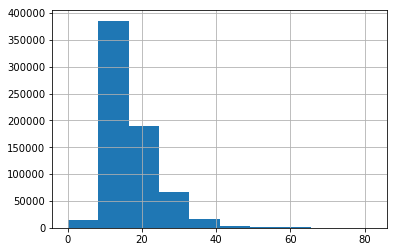

In [47]:
ftrain['VintageMonths'] = ftrain['VintageMonths'].astype(int)
import matplotlib.pyplot as plt
ftrain.VintageMonths.hist()
plt.show()

In [48]:
def Vint(row):
    if row['VintageMonths'] < 10:
        return 'VY'
    elif row['VintageMonths'] < 20:
        return 'Y'
    elif row['VintageMonths'] < 30:
        return 'M'
    elif row['VintageMonths'] < 40:
        return 'O'
    else:
        return 'VO'
    
ftrain['Vint'] = ftrain.apply(lambda row: Vint(row), axis=1)

In [49]:
ftrain['CategoricalVint'] = ftrain['Vint'].map( {'VY': 0, 'Y': 1, 'M': 2, 'O': 3, 'VO': 4} ).astype(int)

In [50]:
ftrain.dtypes

User_ID                            int64
Article_ID                         int64
Rating                             int64
ID                                object
Var1                               int64
Age                                int64
VintageMonths                      int64
NumberOfArticlesBySameAuthor       int64
NumberOfArticlesinSameCategory     int64
Vint                              object
CategoricalVint                    int64
dtype: object

In [51]:
ftrain.head()

,User_ID,Article_ID,Rating,ID,Var1,Age,VintageMonths,NumberOfArticlesBySameAuthor,NumberOfArticlesinSameCategory,Vint,CategoricalVint
0,20080828074,1219102233,0,20080828074_1219102233,0,1,25,88,289,M,2
1,20080851125,1219110304,6,20080851125_1219110304,0,1,12,37,465,Y,1
2,20080820760,1219151095,0,20080820760_1219151095,0,1,23,156,187,M,2
3,20080824760,1219295837,5,20080824760_1219295837,0,2,9,3,159,VY,0
4,20080883177,1219209257,4,20080883177_1219209257,0,1,16,2,161,Y,1


In [52]:
test.head()

,User_ID,Article_ID,ID
0,20080822161,1219173561,20080822161_1219173561
1,20080839116,1219217951,20080839116_1219217951
2,20080831336,1219224091,20080831336_1219224091
3,20080820936,1219186943,20080820936_1219186943
4,20080823287,1219165896,20080823287_1219165896


In [53]:
print 'Shape of the dataset is :', test.shape
print 'No.of Null in User_ID:-', sum(pd.isnull(test['User_ID']))
print 'No.of Null in Article_ID:-', sum(pd.isnull(test['Article_ID']))

Shape of the dataset is : (291023, 3)
No.of Null in User_ID:- 0
No.of Null in Article_ID:- 0


In [98]:
y_train = ftrain['Rating'].ravel()
fftrain = ftrain.drop(['ID','Vint','VintageMonths','Rating', 'User_ID', 'Article_ID'], axis=1)         # data: Features
x_train = fftrain.values

In [77]:
fftrain.head()

,Var1,Age,NumberOfArticlesBySameAuthor,NumberOfArticlesinSameCategory,CategoricalVint
0,0,1,88,289,2
1,0,1,37,465,1
2,0,1,156,187,2
3,0,2,3,159,0
4,0,1,2,161,1


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [83]:
model = RandomForestClassifier()
n_estimators = [30, 40, 50]
max_depth = [4, 6]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(x_train, y_train)

[4, 6]
Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.8min finished


Best: -1.294087 using {'n_estimators': 40, 'max_depth': 6}
-1.298087 (0.000088) with: {'n_estimators': 30, 'max_depth': 4}
-1.298041 (0.000096) with: {'n_estimators': 40, 'max_depth': 4}
-1.297972 (0.000099) with: {'n_estimators': 50, 'max_depth': 4}
-1.294245 (0.000134) with: {'n_estimators': 30, 'max_depth': 6}
-1.294087 (0.000167) with: {'n_estimators': 40, 'max_depth': 6}
-1.294111 (0.000225) with: {'n_estimators': 50, 'max_depth': 6}


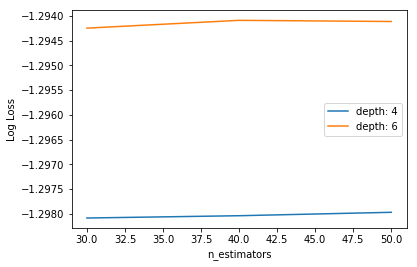

In [84]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.show()

In [85]:
test.head()

,User_ID,Article_ID,ID
0,20080822161,1219173561,20080822161_1219173561
1,20080839116,1219217951,20080839116_1219217951
2,20080831336,1219224091,20080831336_1219224091
3,20080820936,1219186943,20080820936_1219186943
4,20080823287,1219165896,20080823287_1219165896


In [86]:
ntest = test.merge(user, on='User_ID', how='left')

In [87]:
ftest = ntest.merge(article, on='Article_ID', how='left')

In [88]:
ftest.head()

,User_ID,Article_ID,ID,Var1,Age,VintageMonths,NumberOfArticlesBySameAuthor,NumberOfArticlesinSameCategory
0,20080822161,1219173561,20080822161_1219173561,A,60-70,15,37,355
1,20080839116,1219217951,20080839116_1219217951,A,20-30,12,4,169
2,20080831336,1219224091,20080831336_1219224091,I,30-40,11,47,124
3,20080820936,1219186943,20080820936_1219186943,A,30-40,12,29,416
4,20080823287,1219165896,20080823287_1219165896,L,30-40,9,96,210


In [89]:
ftest['Var1'] =ftest['Var1'].replace(['L','J','K','R','M','G', 'N', 'Q', 'V', 'P', 'S', 'O', 'U','T','W'], 'Lowers')

In [90]:
ftest['Var1'] = ftest['Var1'].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'I':6, 'Lowers':7, 'Other':8}).astype(int)

In [91]:
ftest['Age'] = ftest['Age'].map( {'unknown': 0, '30-40': 1, '20-30': 2, '40-50': 3, '50-60': 4, '15-20':5, '60-70':6, 'Less tha 15': 7, 'More than 70':8} ).astype(int)

In [92]:
ftest['Vint'] = ftest.apply(lambda row: Vint(row), axis=1)

In [93]:
ftest['CategoricalVint'] = ftest['Vint'].map( {'VY': 0, 'Y': 1, 'M': 2, 'O': 3, 'VO': 4} ).astype(int)

In [94]:
ftest.shape

(291023, 10)

In [99]:
fftest = ftest.drop(['ID','Vint','VintageMonths','User_ID','Article_ID'], axis=1)         # data: Features
x_test = fftest.values

In [96]:
fftest.head()

,Var1,Age,NumberOfArticlesBySameAuthor,NumberOfArticlesinSameCategory,CategoricalVint
0,0,6,37,355,1
1,0,2,4,169,1
2,6,1,47,124,1
3,0,1,29,416,1
4,7,1,96,210,0


In [101]:
# trianing and fitting
clf = RandomForestClassifier(max_depth=6, n_estimators=40)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

In [103]:
final_sub = pd.DataFrame({ 'ID': test.ID,'Rating': pred })
final_sub.to_csv("/Users/viswanathravindran/AVDatahack/NewsArticle/Out1.csv", index=False)